## heart disease prediction by classification

 **steps to be followed through the model building**
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experiments

In [1]:
# importing EDA tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#importing classification models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

#importing evaluation tools
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.metrics import roc_curve, auc

## loading data

In [2]:
df = pd.read_csv("heart-disease.csv")

In [3]:
df.head()
df
df.shape

(303, 14)

**Data analysis process**
1. types of data we have, and how they are treated
2. Handle missing values
3. Outliers
4. Feature selection

In [4]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [5]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

**count of both the classes is almost same, so the data is considered as counted**

In [6]:
# check for missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**no missing values in the data, so no filling of data is needed**

to explore the data further,we need to compare the columns. There is no proper order for this. we just need to keep comparing

In [7]:
# first let us compare the sex to target columns
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [8]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


**the crosstab suggests that about 75% of women tend to have heart disease, and about 50% of men tend to have heart disease**

<Axes: xlabel='target'>

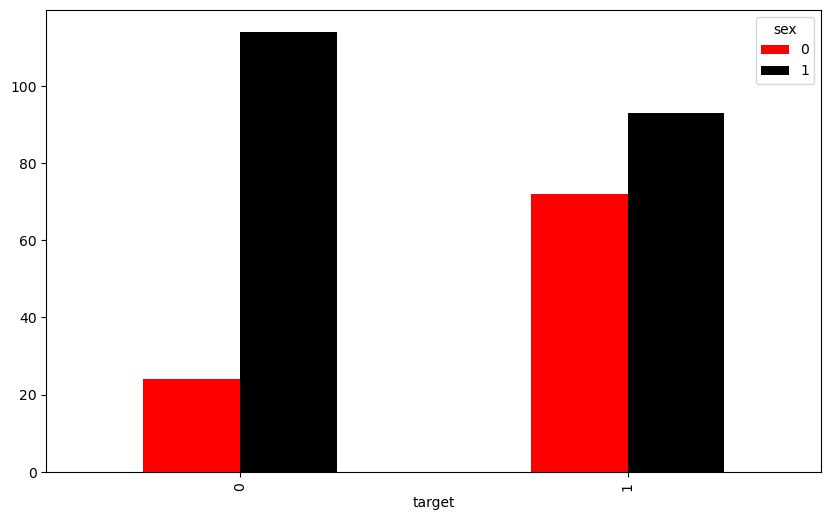

In [10]:
pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(10, 6), color=['red', 'black'])

## comparison age vs. thalach vs. heart-disease
- thalach means maximum heart rate achieved (as per data dictionary)

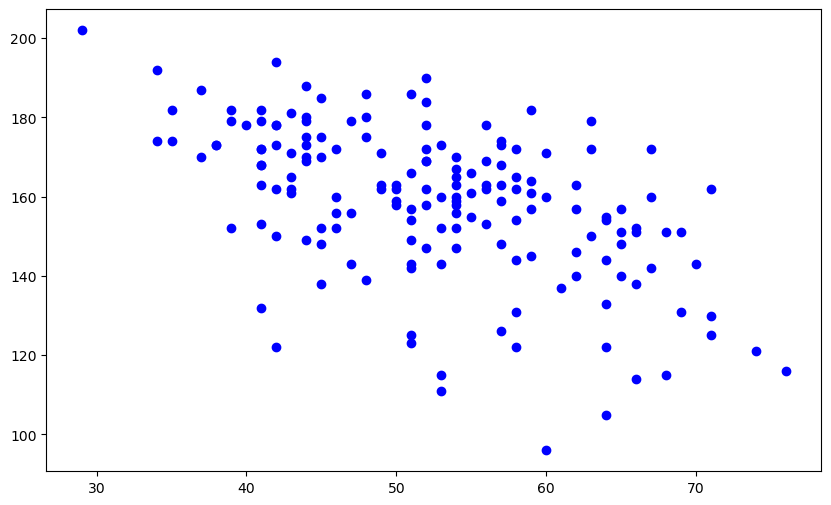

In [11]:
#graph for positive target
plt.figure(figsize=(10, 6))

plt.scatter(df.age[df.target==1], df.thalach[df.target==1], color='blue')

we can see a lineraly decreasing heart rate with increase in age

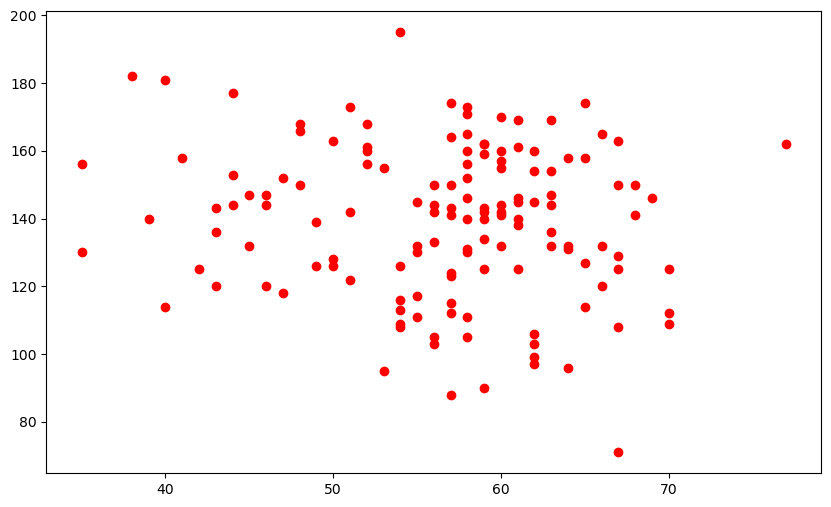

In [12]:
#graph for negative target
plt.figure(figsize=(10, 6))

plt.scatter(df.age[df.target==0], df.thalach[df.target==0], color='red')

- though there is linear decrese in heart rate, it does not seem to have proper pattern

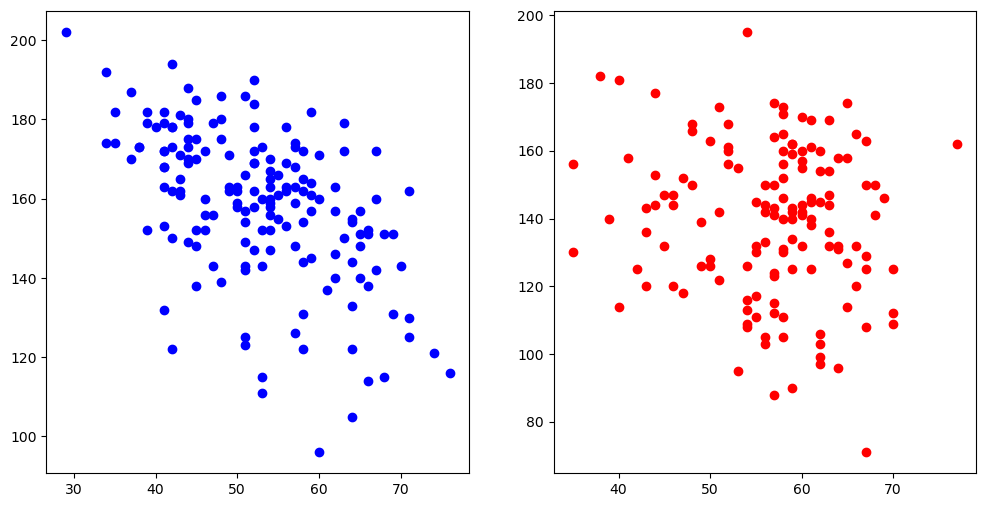

In [13]:
# subplotting both the graphs
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
axes[0].scatter(df.age[df.target==1], df.thalach[df.target==1], color='blue')
axes[1].scatter(df.age[df.target==0], df.thalach[df.target==0], color='red')

<function matplotlib.pyplot.legend(*args, **kwargs)>

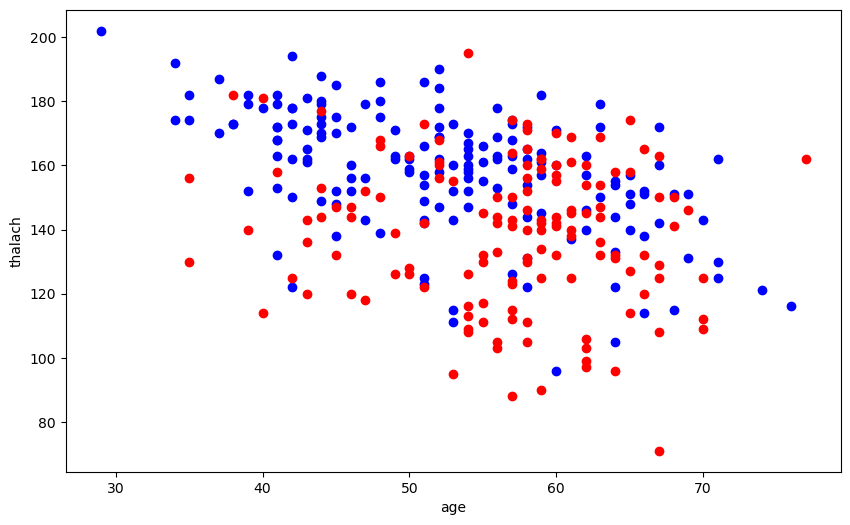

In [14]:
#plotting both the points in the same graph for better comparison
plt.figure(figsize=(10, 6))

plt.scatter(df.age[df.target==1], df.thalach[df.target==1], color='blue')
plt.scatter(df.age[df.target==0], df.thalach[df.target==0], color='red')
plt.xlabel('age')
plt.ylabel('thalach')
plt.legend

- no proper pattern that can be detected easily with naked eye. ML comes into play in such cases. Lets do it later in this session

<Axes: ylabel='Frequency'>

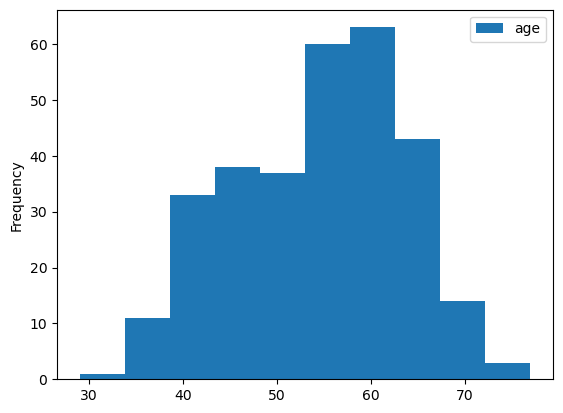

In [15]:
df[['age']].plot.hist()

 - the age is normally distrubuted
 - it also clear that there are no outliers

## chestPain vs. Heart Disease

In [16]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [17]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


- pain type 1 and 2 have high chnaces of heart disease

## correlation matrix
- The correlation matrix describes or quantisizes about the relation between two features. The relation ranage form -1 to 1

In [18]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


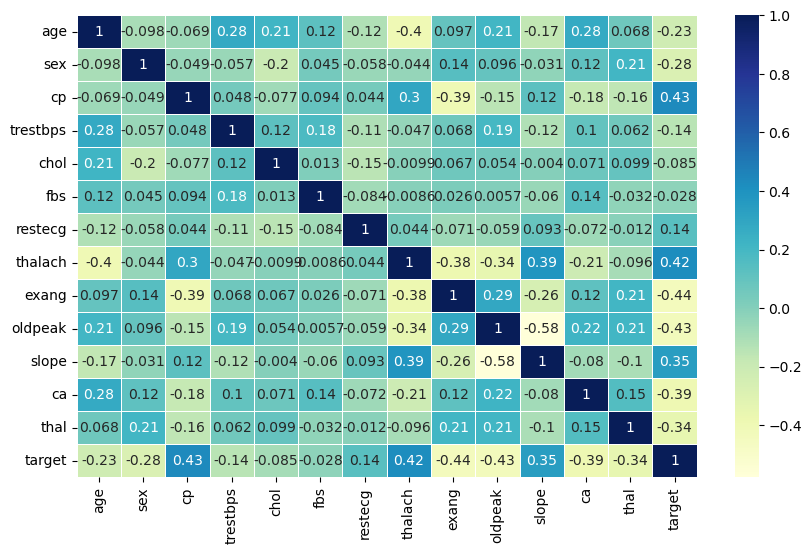

In [19]:
# let us plot a heatmap to better analyze the correlation
cor_matrix = df.corr()

fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.heatmap(cor_matrix,
                annot = True,
                linewidths = 0.5,
                cmap = 'YlGnBu')

- from the above plot you can easily trace the relation between any two features of the data

## Modelling 

In [20]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [21]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [22]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [24]:
x_train, x_test, y_train, y_test

(     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
 20    59    1   0       135   234    0        1      161      0      0.5   
 193   60    1   0       145   282    0        0      142      1      2.8   
 178   43    1   0       120   177    0        0      120      1      2.5   
 261   52    1   0       112   230    0        1      160      0      0.0   
 174   60    1   0       130   206    0        0      132      1      2.4   
 ..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
 47    47    1   2       138   257    0        0      156      0      0.0   
 128   52    0   2       136   196    0        0      169      0      0.1   
 2     41    0   1       130   204    0        0      172      0      1.4   
 241   59    0   0       174   249    0        1      143      1      0.0   
 185   44    1   0       112   290    0        0      153      0      0.0   
 
      slope  ca  thal  
 20       1   0     3  
 193      1   2     3  
 1

- we have split the data into train and test. Now we need to do model selection, that is best suited for our problem statement.
- Choosing the optimal model is clearly experimental, that is trial and error.
- Though, we have an overview of the types of models, we can make a short list of models using that knowledge.
- We can pick the best model out of the shortlist only by experimenting.

**After going through the scikit documentation for model selection, I have shortlisted 3 models, those are best fit for the problem.**
1. Linear SVC
2. KNN
3. RandomForest
4. Logistic Regression

In [25]:
# Create a dictionary of models so that we loop the models whenever needed 
models = {"Linear SVC": LinearSVC(),
        "KNN": KNeighborsClassifier(),
        "Random Classifier": RandomForestClassifier(),
         "Logistic Regression": LogisticRegression()}

# Create a function to to fit and test the model
def fit_and_score (models, x_train, x_test, y_train, y_test):
    
    np.random.seed(42)
    
    model_scores={}
    
    for name, model in models.items():
        model.fit(x_train, y_train)
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [26]:
model_scores = fit_and_score(models, x_train, x_test, y_train, y_test)
model_scores

C:\Users\srich\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\srich\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\srich\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Linear SVC': 0.4098360655737705,
 'KNN': 0.6885245901639344,
 'Random Classifier': 0.8688524590163934,
 'Logistic Regression': 0.9016393442622951}

**All the above scores are accuracy scores, because default score of classifiers is ACCURACY**

## Post baseline model procedure

1. Hyperparameter tuning
2. Feature scaling
3. Confusion mtrix
4. Cross Validation
5. Precision
6. Recall
7. F1 score
8. Classification report
9. ROC Curve
10. Area under curve

### 1. Hyperparameter tuning using RandomizedSearchCV
 LinearSVC and KNN are too inaccurate, so let us consider tuning RandomClassifier and LogisticRegression for tuning

In [27]:
# Hyperparameter Grid for LogisticRegression
log_reg_grid = {'C' : np.logspace(-4, 4, 20),
               'solver' : ['liblinear']}

# Hyperparameter Grid for RandomForest
rf_grid = {'n_estimators' : np.arange(10, 1000, 50),
          'max_depth' : [None, 3, 5, 10],
          'min_samples_split' : np.arange(2, 20, 20),
          'min_samples_leaf' : np.arange(1, 20, 20)}

In [28]:
#Tuning the Hyperparameters
np.random.seed(42)

#Tuning setup for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions = log_reg_grid,
                               cv = 5,
                               n_iter = 20,
                               verbose = True)

#fitting log_reg
rs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [29]:
#finding the best parameters
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [30]:
#evaluating the score of rs_log_reg
rs_log_reg.score(x_test, y_test)

0.9016393442622951

In [31]:
#Tuning setup for RandomForest
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                               param_distributions = rf_grid,
                               cv = 5,
                               n_iter = 20,
                               verbose = True)

rs_rf.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([1]),
                                        'min_samples_split': array([2]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [32]:
rs_rf.best_params_

{'n_estimators': 410,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 3}

In [33]:
rs_rf.score(x_test, y_test)

0.8524590163934426

In [34]:
model_scores

{'Linear SVC': 0.4098360655737705,
 'KNN': 0.6885245901639344,
 'Random Classifier': 0.8688524590163934,
 'Logistic Regression': 0.9016393442622951}

## Hyperparameter Tuning using GridSearchCV

As the LogisticRegression is performing the best out all our chosen models, i.e improving on tu
ning, lets keep tuning further

In [35]:
log_reg_grid = {'C' : np.logspace(-4, 4, 30),
               'solver' : ['liblinear']}

#settingup the GridSearchCV for LogisticRegression()
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid = log_reg_grid,
                         cv = 5,
                         verbose = True)

#fitting LogisticRegression() to GridSearchCV
gs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [36]:
gs_log_reg.best_params_

{'C': 0.38566204211634725, 'solver': 'liblinear'}

In [37]:
gs_log_reg.score(x_test, y_test)

0.9016393442622951

## Evaluating our model using various matrics

In [38]:
y_preds = gs_log_reg.predict(x_test)

In [39]:
fpr, tpr, thresholds = roc_curve(y_test, y_preds)
fpr, tpr, thresholds

(array([0.        , 0.23809524, 1.        ]),
 array([0.   , 0.975, 1.   ]),
 array([inf,  1.,  0.]))

In [40]:
plt.plot(fpr, tpr, label = 'AUC = %0.2f' % auc_score)

NameError: name 'auc_score' is not defined

In [ ]:
auc_score = auc(fpr, tpr)
auc_score

In [ ]:
confusion_matrix(y_test, y_preds)

In [ ]:
fig, ax = plt.subplots(figsize=(3, 2.3))
ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                annot = True)
plt.xlabel('True values')
plt.ylabel('Predicted values')

In [ ]:
print(classification_report(y_test, y_preds))

## Evaluating using cross validation

In [ ]:
gs_log_reg.best_params_

In [ ]:
clf = LogisticRegression(C= 0.20433597178569418,
                         solver = "liblinear")

In [ ]:
#cross validation accuracy
cv_acc = cross_val_score(clf,
                        x,
                        y,
                        cv = 5,
                        scoring = "accuracy")
cv_acc

In [ ]:
cv_acc = np.mean(cv_acc)
cv_acc

In [ ]:
#cross validation precision
cv_prec = cross_val_score(clf,
                        x,
                        y,
                        cv = 5,
                        scoring = "precision")
cv_prec
cv_prec = np.mean(cv_prec)
cv_prec

In [ ]:
#cross validation recall
cv_recall = cross_val_score(clf,
                        x,
                        y,
                        cv = 5,
                        scoring = "recall")
cv_recall
cv_recall = np.mean(cv_recall)
cv_recall

In [ ]:
#cross validation f1
cv_f1 = cross_val_score(clf,
                        x,
                        y,
                        cv = 5,
                        scoring = "f1")
cv_f1
cv_f1 = np.mean(cv_f1)
cv_f1

## Feature Selection

In [ ]:
clf = LogisticRegression(C= 0.20433597178569418,
                         solver = "liblinear")

clf.fit(x_train, y_train)

In [ ]:
# Feature coeff_

clf.coef_

In [ ]:
coef = zip(df.columns, list(clf.coef_[0]))
coef

In [ ]:
coef = dict(coef)
coef
coef = pd.DataFrame(coef)
coef

In [ ]:
coef.plot.bar(title = "Feature Selection", label = False)